Heart Disease Classification using Neural Networks in Tensorflow environment

Epoch 1/250
16/16 [==============================] - 0s 11ms/step - loss: 1.2247 - accuracy: 0.3512 - val_loss: 1.1673 - val_accuracy: 0.3770
Epoch 2/250
16/16 [==============================] - 0s 5ms/step - loss: 1.1465 - accuracy: 0.3678 - val_loss: 1.1123 - val_accuracy: 0.3770
Epoch 3/250
16/16 [==============================] - 0s 5ms/step - loss: 1.0800 - accuracy: 0.3802 - val_loss: 1.0633 - val_accuracy: 0.3770
Epoch 4/250
16/16 [==============================] - 0s 6ms/step - loss: 1.0265 - accuracy: 0.4091 - val_loss: 1.0207 - val_accuracy: 0.3934
Epoch 5/250
16/16 [==============================] - 0s 5ms/step - loss: 0.9797 - accuracy: 0.4256 - val_loss: 0.9824 - val_accuracy: 0.3934
Epoch 6/250
16/16 [==============================] - 0s 5ms/step - loss: 0.9371 - accuracy: 0.4587 - val_loss: 0.9502 - val_accuracy: 0.4262
Epoch 7/250
16/16 [==============================] - 0s 5ms/step - loss: 0.9011 - accuracy: 0.4669 - val_loss: 0.9202 - val_accuracy: 0.4426
Epoch 8/250


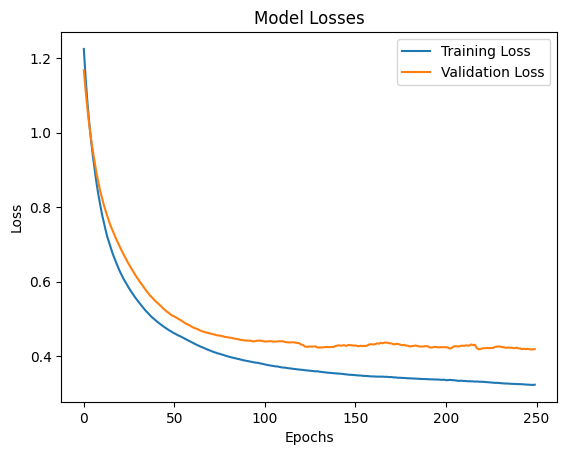

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load the dataset
data = pd.read_csv("heart_disease.csv")

# Split into features and target
X = data.iloc[:, :-1].values  # First 13 columns are features
y = data.iloc[:, -1].values   # Last column is the target

# Normalize the feature data
scaler = StandardScaler()  # You can also use MinMaxScaler for scaling between 0 and 1
X_normalized = scaler.fit_transform(X)


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

# Build the neural network model
model = Sequential([
    Dense(4, activation='relu', input_dim=X_train.shape[1],kernel_regularizer=l2(0.01)),
    # Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=16, verbose=1)

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
train_loss, train_accuracy = model.evaluate(X_train, y_train)


# Predictions
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Print metrics
print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Plot training and validation losses
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
